<a href="https://colab.research.google.com/github/Deepti2412/Codes/blob/master/MP_Neuron_and_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
cancer=datasets.load_breast_cancer()

In [4]:
x=cancer.data
y=cancer.target

In [5]:
data=pd.DataFrame(x,columns=cancer.feature_names)

In [6]:
data['class']=cancer.target

In [7]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
X=data.drop("class",axis=1)
Y=data['class']

In [9]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [10]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [11]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.10, stratify= Y,random_state=42)

In [16]:
print(Y.mean(),Y_train.mean(),Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [17]:
print(X.mean(),X_train.mean(),X_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [18]:
#Binarisation of Input

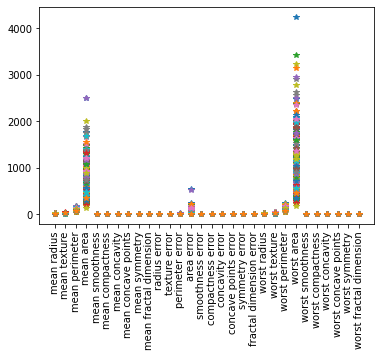

In [19]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [20]:
X_binarized_3_train=X_train['mean area'].map(lambda x:0 if x <1000 else 1)

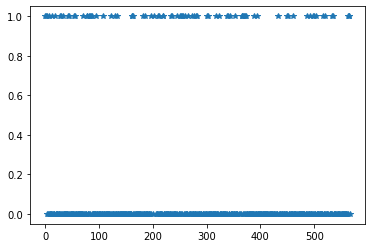

In [21]:
plt.plot(X_binarized_3_train,'*')

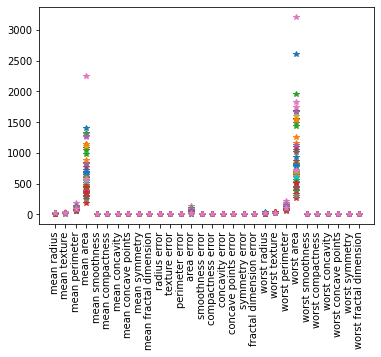

In [22]:
plt.plot(X_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [23]:
X_binarized_train=X_train.apply(pd.cut,bins=2,labels=[1,0])

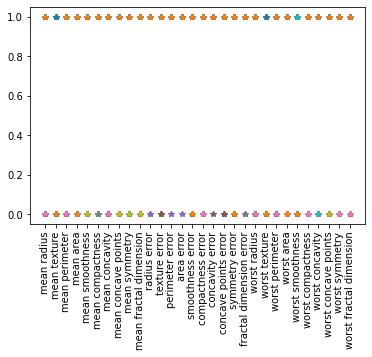

In [24]:
plt.plot(X_binarized_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [25]:
X_binarized_train.shape

(512, 30)

In [26]:
X_binarized_test=X_test.apply(pd.cut,bins=2,labels=[1,0])

In [27]:
X_binarized_test=X_binarized_test.values
X_binarized_train=X_binarized_train.values

In [28]:
type(X_binarized_train)

numpy.ndarray

In [29]:
# inference based

In [30]:
from random import randint
b=3
i=randint(0,X_binarized_train.shape[0])
print("row",i)
if(np.sum(X_binarized_train[i:])>=b):
  print("The tumor is malignant")
else:
  print("The tumor is bening")
if Y_train[i]==1:
  print("MAlignant")
else:
  print("bening")

row 70
The tumor is malignant
bening


In [31]:
b=3
Y_pred_train=[]
accurate=0
for x,y in zip(X_binarized_train,Y_train):
   y_pred=(np.sum(x)>=b)
   Y_pred_train.append(y_pred)
   accurate+=(y==y_pred)
   
print(accurate,accurate/X_binarized_train.shape[0])



321 0.626953125


In [32]:
for b in range(X_binarized_train.shape[1]+1):
  Y_pred_train=[]
  accurate=0

  for x,y in zip(X_binarized_train,Y_train):
      y_pred=(np.sum(x)>=b)
      Y_pred_train.append(y_pred)
      accurate+=(y==y_pred)
   
  print(b,accurate,accurate/X_binarized_train.shape[0])


0 321 0.626953125
1 321 0.626953125
2 321 0.626953125
3 321 0.626953125
4 321 0.626953125
5 321 0.626953125
6 321 0.626953125
7 321 0.626953125
8 321 0.626953125
9 321 0.626953125
10 321 0.626953125
11 321 0.626953125
12 321 0.626953125
13 322 0.62890625
14 324 0.6328125
15 327 0.638671875
16 329 0.642578125
17 334 0.65234375
18 339 0.662109375
19 340 0.6640625
20 347 0.677734375
21 356 0.6953125
22 365 0.712890625
23 379 0.740234375
24 397 0.775390625
25 411 0.802734375
26 425 0.830078125
27 441 0.861328125
28 436 0.8515625
29 414 0.80859375
30 368 0.71875


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
b=28
y_pred_test=[]
for x  in X_binarized_test:
      y_pred=(np.sum(x)>=b)
      y_pred_test.append(y_pred)
      accurate+=(y==y_pred)


print(b,accuracy_score(y_pred_test,Y_test))

28 0.7719298245614035


# Creating MP NEURON CLASS

In [35]:
class MPNEURON:

   def __init__(self):
     self.b=None
    
   def model(self,x):
     return(np.sum(x)>=self.b)
   
   def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)
   
   def fit(self,X,Y):
    accuracy={}

    for b in range(X.shape[1]+1):
      self.b=b
      Y_pred=self.predict(X)
      accuracy[b]=accuracy_score(Y_pred,Y)

      best_b=max(accuracy,key=accuracy.get)
      self.b=best_b

    print("OPtimal value of b is:  ",best_b)
    print("Highest accuracy is: ",  accuracy[best_b])

In [36]:
mpneuron=MPNEURON()
mpneuron.fit(X_binarized_train,Y_train)

OPtimal value of b is:   27
Highest accuracy is:  0.861328125


In [37]:
Y_test_pred=mpneuron.predict(X_binarized_test)
accuracy=accuracy_score(Y_test_pred,Y_test)

In [38]:
print(accuracy)

0.8421052631578947


#Perceptron Model

In [39]:
class Perceptron:
  
  def __init__(self):
    self.w=None
    self.b=None
  
  def model(self,x):
    return 1 if(np.dot(self.w,x) >= self.b) else 0

  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,epochs=1,lr=1):

     self.w=np.ones(X.shape[1])
     self.b=0
     
     accuracy={}
     max_accuracy=0 
     wt_matrix=[]

     for i in range(epochs):
       for x,y in zip(X,Y):
        y_pred=self.model(x)

        if y==1 and y_pred==0:
          self.w=self.w+lr*x
          self.b=self.b+lr*1

        elif y==0 and y_pred==1:
          self.w=self.w-lr*x
          self.b=self.b-lr*1

        wt_matrix.append(self.w)

       accuracy[i]=accuracy_score(self.predict(X),Y)
       values = accuracy.values()
       if (accuracy[i]> max_accuracy):
         max_accuracy=accuracy[i]

         chckptw=self.w
         chckptb=self.b

     self.w=chckptw
     self.b=chckptb
     print(max_accuracy)

     return(np.array(wt_matrix))
      
     plt.plot(list(values))
     plt.ylim([0,1])
     plt.show()
       
       
     
     
    
     
     

In [40]:
X_train=X_train.values
X_test=X_test.values

In [54]:
perceptron=Perceptron()
wt_matrix=perceptron.fit(X_train,Y_train,1000,1)

0.919921875


In [42]:
Y_pred_train=perceptron.predict(X_train)
print(accuracy_score(Y_pred_train,Y_train))

0.919921875


In [43]:
Y_pred_test=perceptron.predict(X_test)
print(accuracy_score(Y_pred_test,Y_test))

0.8771929824561403


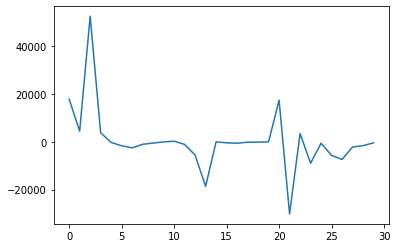

In [55]:
plt.plot(wt_matrix[-1,:])
plt.show()

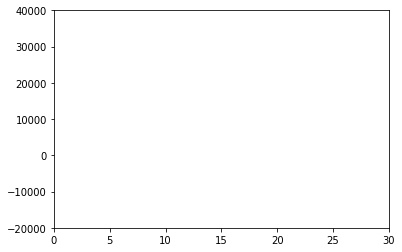

In [56]:
fig, ax = plt.subplots()

ax.set_xlim(0, wt_matrix.shape[1])
ax.set_ylim((-20000, 40000))

line, = ax.plot([], [], lw=2)

In [60]:
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [65]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=1000, interval=200, blit=True)

In [ ]:
HTML(anim.to_html5_video())